In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-28 18:03:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   165MB/s    in 0.6s    

2023-07-28 18:03:57 (165 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [3]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 & 1, also called normalization/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 163ms/step - loss: 0.5586 - accuracy: 0.7027 - val_loss: 0.4066 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4337 - accuracy: 0.8067 - val_loss: 0.3597 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3939 - accuracy: 0.8307 - val_loss: 0.3269 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3700 - accuracy: 0.8493 - val_loss: 0.4116 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 8s 162ms/step - loss: 0.3359 - accuracy: 0.8640 - val_loss: 0.3432 - val_accuracy: 0.8580


In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target Directory of images
                                               target_size=(224, 224), # Target size of images
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)
# Create ImageDataGenerator training instance with data augmentaion
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose only
print("Non-augmented training data:")
# Create  non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False
                                               )
IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Return seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model
model_8 = Sequential([
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=15,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
47/47 [==============================] - 39s 744ms/step - loss: 0.6844 - accuracy: 0.5587 - val_loss: 0.5990 - val_accuracy: 0.6920
Epoch 2/15
47/47 [==============================] - 26s 545ms/step - loss: 0.5885 - accuracy: 0.6980 - val_loss: 0.4533 - val_accuracy: 0.8220
Epoch 3/15
47/47 [==============================] - 25s 539ms/step - loss: 0.5424 - accuracy: 0.7407 - val_loss: 0.4429 - val_accuracy: 0.8020
Epoch 4/15
47/47 [==============================] - 27s 576ms/step - loss: 0.5274 - accuracy: 0.7553 - val_loss: 0.4191 - val_accuracy: 0.8500
Epoch 5/15
47/47 [==============================] - 25s 538ms/step - loss: 0.5267 - accuracy: 0.7487 - val_loss: 0.4988 - val_accuracy: 0.7820
Epoch 6/15
47/47 [==============================] - 25s 541ms/step - loss: 0.5231 - accuracy: 0.7387 - val_loss: 0.4106 - val_accuracy: 0.8220
Epoch 7/15
47/47 [==============================] - 25s 534ms/step - loss: 0.5098 - accuracy: 0.7607 - val_loss: 0.4062 - val_accuracy: 0.8220

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img
# Load in and preprocess our custom image
steak = load_and_prep_image("Grilled-steak.jpg")

In [ ]:
# View our example image
!wget https://www.firstforwomen.com/wp-content/uploads/sites/2/2022/05/Grilled-steak.jpg
steak = mpimg.imread("Grilled-steak.jpg")
# Create a function to import an image and resize it to be abale to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img
# Load in and preprocess our custom image
steak = load_and_prep_image("Grilled-steak.jpg")
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predcited class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

--2023-05-17 16:55:00--  https://www.firstforwomen.com/wp-content/uploads/sites/2/2022/05/Grilled-steak.jpg
Resolving www.firstforwomen.com (www.firstforwomen.com)... 192.0.66.160
Connecting to www.firstforwomen.com (www.firstforwomen.com)|192.0.66.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 803602 (785K) [image/jpeg]
Saving to: ‘Grilled-steak.jpg.1’

Grilled-steak.jpg.1 100%[===================>] 784.77K  --.-KB/s    in 0.007s  

2023-05-17 16:55:01 (115 MB/s) - ‘Grilled-steak.jpg.1’ saved [803602/803602]



# Multi-class Image classification

We've just been through a bunch of the following steps with a binary classification probelm, now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with our data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-17 16:55:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  20.2MB/s    in 26s     

2023-05-17 16:55:36 (18.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


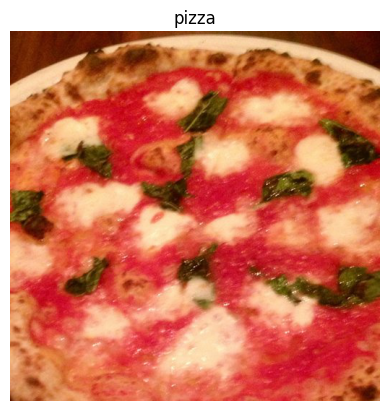

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir = train_dir,
                        target_class= random.choice(class_names))

### 2. Preprocess our data (prepare it for a model)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### 3. Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3),  activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed 10 oputput neuron and activation is softmax
])

# Compile our model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


### 4. Fit a model

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 217ms/step - loss: 2.1200 - accuracy: 0.2299 - val_loss: 1.9385 - val_accuracy: 0.3204
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.8277 - accuracy: 0.3696 - val_loss: 1.9281 - val_accuracy: 0.3340
Epoch 3/5
235/235 [==============================] - 63s 268ms/step - loss: 1.4860 - accuracy: 0.5093 - val_loss: 1.8285 - val_accuracy: 0.3744
Epoch 4/5
235/235 [==============================] - 50s 211ms/step - loss: 0.9257 - accuracy: 0.7009 - val_loss: 2.2628 - val_accuracy: 0.3172
Epoch 5/5
235/235 [==============================] - 50s 211ms/step - loss: 0.3986 - accuracy: 0.8728 - val_loss: 3.1469 - val_accuracy: 0.3260


### 5. Evaluate our model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 14s 172ms/step - loss: 1.2692 - accuracy: 0.4821


[1.2691588401794434, 0.48208004236221313]

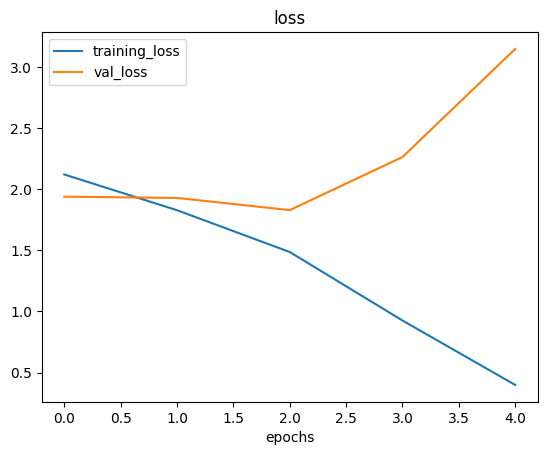

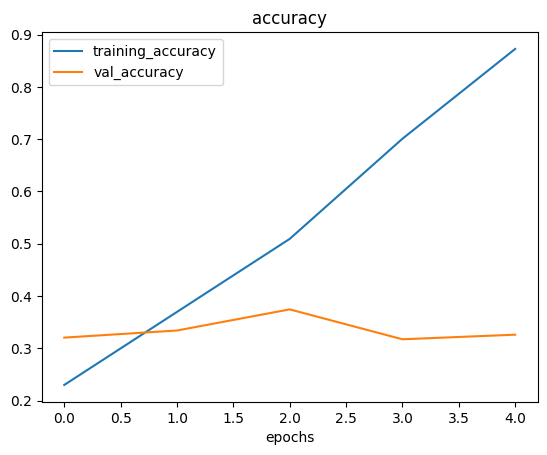

In [ ]:
# Check out the model's loss curves
plot_loss_curves(history_9)

what do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great resuts on the training data but fails to generalize well to unseen data and perform poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not genralizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simpliy the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to reduce # of layers or reduce # hiddem units in layers
* **Use data augmentation** - data augmentation manipukates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
# how about we try and simplify our model first
# Let's try to remove 2 convolutional layers..
model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model with 2x conv layers removed
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 244ms/step - loss: 2.1944 - accuracy: 0.2065 - val_loss: 1.9786 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 47s 202ms/step - loss: 1.7953 - accuracy: 0.3891 - val_loss: 1.8862 - val_accuracy: 0.3452
Epoch 3/5
235/235 [==============================] - 47s 201ms/step - loss: 1.3821 - accuracy: 0.5543 - val_loss: 1.9605 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 48s 203ms/step - loss: 0.8379 - accuracy: 0.7468 - val_loss: 2.3143 - val_accuracy: 0.2940
Epoch 5/5
235/235 [==============================] - 47s 200ms/step - loss: 0.3902 - accuracy: 0.8980 - val_loss: 2.9617 - val_accuracy: 0.2804


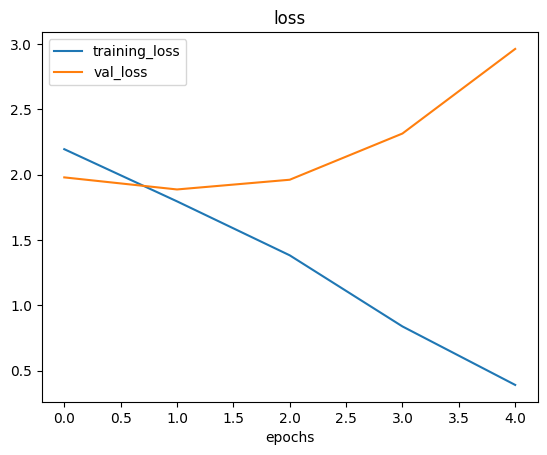

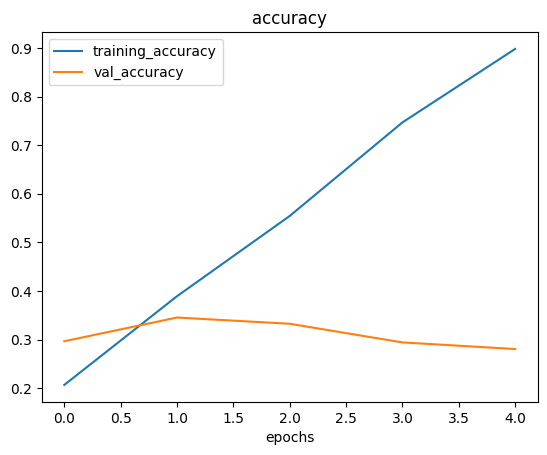

In [ ]:
# Check out the loss curves
plot_loss_curves(history_10)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Tryin to reduce overfitting by data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:

* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit in on the augmented training data of 10 classes
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using the same setup as previous models)
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
# fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 121s 509ms/step - loss: 2.1955 - accuracy: 0.1984 - val_loss: 2.0102 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 127s 541ms/step - loss: 2.0645 - accuracy: 0.2637 - val_loss: 2.0005 - val_accuracy: 0.2852
Epoch 3/5
235/235 [==============================] - 119s 505ms/step - loss: 2.0089 - accuracy: 0.2963 - val_loss: 1.8930 - val_accuracy: 0.3488
Epoch 4/5
235/235 [==============================] - 117s 498ms/step - loss: 1.9734 - accuracy: 0.3192 - val_loss: 1.8669 - val_accuracy: 0.3300
Epoch 5/5
235/235 [==============================] - 118s 501ms/step - loss: 1.9454 - accuracy: 0.3256 - val_loss: 1.8443 - val_accuracy: 0.3644


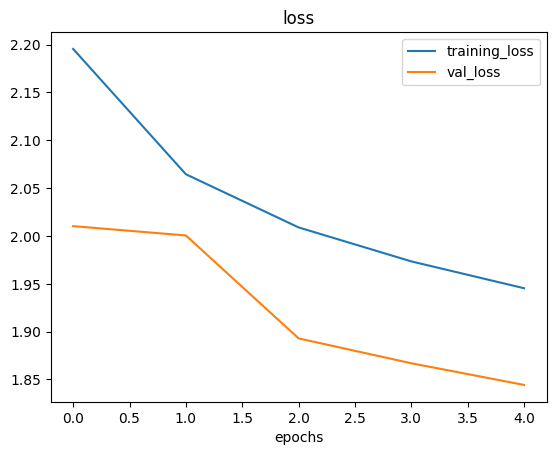

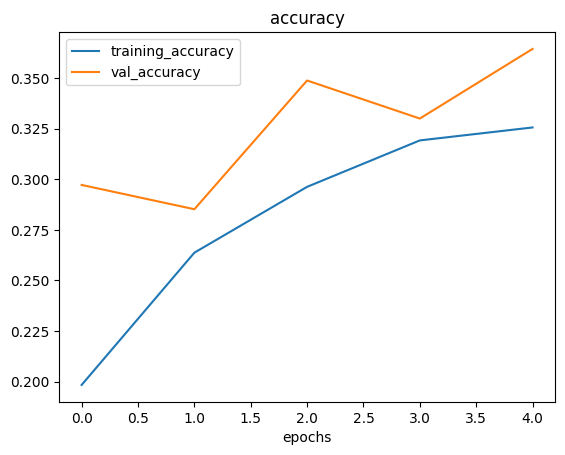

In [ ]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_11)

Now, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong drection) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperpara,eters in our ImageDataGenerator instanc)
- training for longer (e.g. 1- epochs instead of 5 epochs)
- try **transfer learning**

In [ ]:
# Create final model
model_12 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(train_data_augmented,
                          epochs=15,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/15
235/235 [==============================] - 148s 568ms/step - loss: 2.2384 - accuracy: 0.1559 - val_loss: 2.1292 - val_accuracy: 0.1876
Epoch 2/15
235/235 [==============================] - 135s 574ms/step - loss: 2.1633 - accuracy: 0.1985 - val_loss: 2.0392 - val_accuracy: 0.2432
Epoch 3/15
235/235 [==============================] - 131s 558ms/step - loss: 2.1149 - accuracy: 0.2296 - val_loss: 1.9928 - val_accuracy: 0.2892
Epoch 4/15
235/235 [==============================] - 140s 597ms/step - loss: 2.0507 - accuracy: 0.2695 - val_loss: 1.9306 - val_accuracy: 0.3388
Epoch 5/15
235/235 [==============================] - 132s 562ms/step - loss: 1.9971 - accuracy: 0.2960 - val_loss: 1.8315 - val_accuracy: 0.3660
Epoch 6/15
235/235 [==============================] - 133s 567ms/step - loss: 1.9502 - accuracy: 0.3153 - val_loss: 1.8055 - val_accuracy: 0.3832
Epoch 7/15
235/235 [==============================] - 131s 557ms/step - loss: 1.8952 - accuracy: 0.3428 - val_loss: 1.7142 -

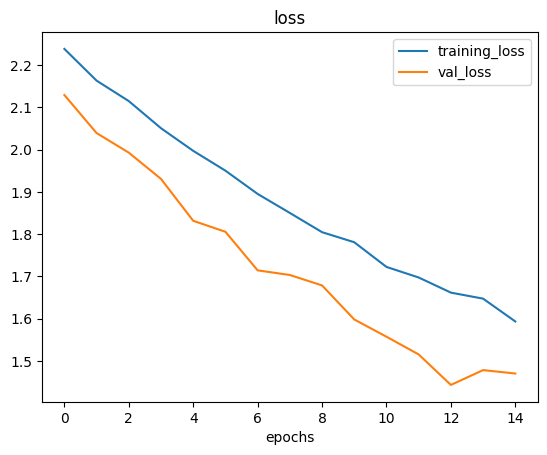

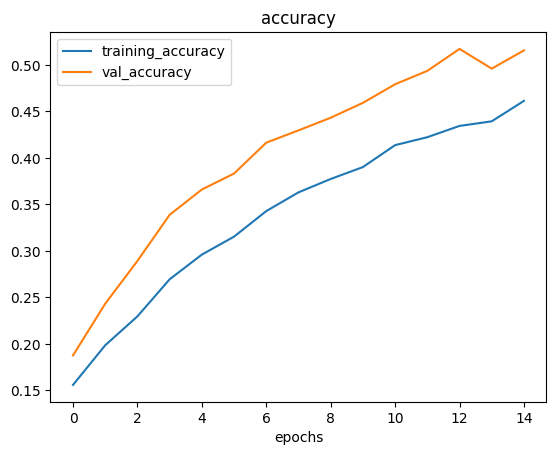

In [ ]:
plot_loss_curves(history_12)

In [ ]:
model_12.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

### Making a prediction with our trained model

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(tf.argmax(pred))

  #Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predcited class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


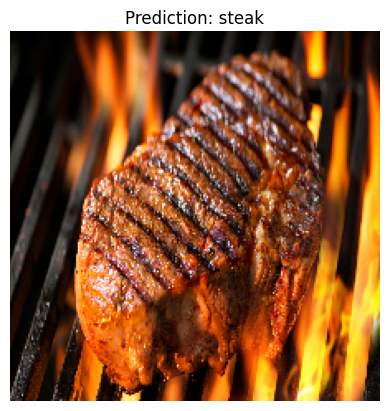

In [ ]:
# Make a prediction using model_12
pred_and_plot(model_12, "Grilled-steak.jpg")

In [ ]:
# Let's get a picture of pizza
!wget https://cdn.apartmenttherapy.info/image/fetch/f_auto,q_auto:eco,w_1460/https://storage.googleapis.com/gen-atmedia/3/2015/07/bd84ba2c08f32a70c1c3638c511dd271d365c611.jpeg

--2023-05-17 18:10:10--  https://cdn.apartmenttherapy.info/image/fetch/f_auto,q_auto:eco,w_1460/https://storage.googleapis.com/gen-atmedia/3/2015/07/bd84ba2c08f32a70c1c3638c511dd271d365c611.jpeg
Resolving cdn.apartmenttherapy.info (cdn.apartmenttherapy.info)... 23.77.19.2, 2600:1413:b000:399::29cc, 2600:1413:b000:381::29cc
Connecting to cdn.apartmenttherapy.info (cdn.apartmenttherapy.info)|23.77.19.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 812695 (794K) [image/jpeg]
Saving to: ‘bd84ba2c08f32a70c1c3638c511dd271d365c611.jpeg’

bd84ba2c08f32a70c1c 100%[===================>] 793.65K  4.16MB/s    in 0.2s    

2023-05-17 18:10:10 (4.16 MB/s) - ‘bd84ba2c08f32a70c1c3638c511dd271d365c611.jpeg’ saved [812695/812695]

